In [1]:
'''
2022春人工智能原理与技术课程
实验一 鸢尾花分类
代码实现部分
Author: 2050814白东昕
'''

'\n2022春人工智能原理与技术课程\n实验一 鸢尾花分类\n代码实现部分\nAuthor: 2050814白东昕\n'

### 一、对比KNN性能

In [2]:
from sklearn.datasets import load_iris #导入iris数据集
from sklearn.model_selection import train_test_split

In [3]:
# 数据集导入与数据集划分
iris_dataset=load_iris()
x = iris_dataset.data
y = iris_dataset.target.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=42)
# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)

In [4]:
# 构造knn模型
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models=[]
# 三种模型
models.append(("KNN",KNeighborsClassifier(n_neighbors=3)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=3,weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=3,radius=1)))

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:462: FutureWarning: Passing additional keyword parameters has no effect and is deprecated in 1.0. An error will be raised from 1.2 and beyond. The ignored keyword parameter(s) are: dict_keys(['n_neighbors']).
  warnings.warn(


In [5]:
# 计算模型各自评分
results=[]
for name,model in models:
    model.fit(x_train,y_train.ravel())#.reval就相当于.reshape(-1),不知道多少列，按实际适配
    results.append((name,model.score(x_test,y_test)))
for i in range(len(results)):
    print("name:{}; score:{:.4f}".format(results[i][0],results[i][1]))

name:KNN; score:1.0000
name:KNN with weights; score:1.0000
name:Radius Neighbors; score:1.0000


In [6]:
# 模型准确率验证
from sklearn.model_selection import KFold,cross_val_score
results=[]
for name,model in models:
    kfold=KFold(n_splits=10) #10折交叉验证产生器
    cv_result=cross_val_score(model,x,y.ravel(),cv=kfold)
    results.append((name,cv_result)) # 3种模型，均得到10次评分
for i in range(len(results)):
    print("name: {}; cross val score: {:.4f}".format(
    results[i][0],results[i][1].mean())) # 求每种模型10次评分的平均值

name: KNN; cross val score: 0.9467
name: KNN with weights; cross val score: 0.9467
name: Radius Neighbors; cross val score: 0.9067


In [7]:
# 整理上述过程；
import warnings
warnings.filterwarnings('ignore')
def trible_KNN(x,y,n_neighbor):

    # 模型构造
    models=[]
    models.append(("KNN",KNeighborsClassifier(n_neighbors=n_neighbor)))
    models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=n_neighbor,weights="distance")))
    models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=n_neighbor,radius=1)))

    # 模型准确率
    results=[]
    for name,model in models:
        kfold=KFold(n_splits=10) #10折交叉验证产生器
        cv_result=cross_val_score(model,x,y.ravel(),cv=kfold)
        results.append((name,cv_result)) # 3种模型，均得到10次评分

    for i in range(len(results)):
        print("name: {}; cross val score: {:.4f}".format(results[i][0],results[i][1].mean())) # 求每种模型10次评分的平均值

In [8]:
# 做参数搜索
for n_neighbor in range(1,10):
    print('KNN n_neighbor为{}时三种模型的准确率：'.format(n_neighbor))
    trible_KNN(x,y,i)

KNN n_neighbor为1时三种模型的准确率：
name: KNN; cross val score: 0.9333
name: KNN with weights; cross val score: 0.9600
name: Radius Neighbors; cross val score: 0.9067
KNN n_neighbor为2时三种模型的准确率：
name: KNN; cross val score: 0.9333
name: KNN with weights; cross val score: 0.9600
name: Radius Neighbors; cross val score: 0.9067
KNN n_neighbor为3时三种模型的准确率：
name: KNN; cross val score: 0.9333
name: KNN with weights; cross val score: 0.9600
name: Radius Neighbors; cross val score: 0.9067
KNN n_neighbor为4时三种模型的准确率：
name: KNN; cross val score: 0.9333
name: KNN with weights; cross val score: 0.9600
name: Radius Neighbors; cross val score: 0.9067
KNN n_neighbor为5时三种模型的准确率：
name: KNN; cross val score: 0.9333
name: KNN with weights; cross val score: 0.9600
name: Radius Neighbors; cross val score: 0.9067
KNN n_neighbor为6时三种模型的准确率：
name: KNN; cross val score: 0.9333
name: KNN with weights; cross val score: 0.9600
name: Radius Neighbors; cross val score: 0.9067
KNN n_neighbor为7时三种模型的准确率：
name: KNN; cross val scor

### 三、最优参数搜索

In [16]:
# 为了更加直观，整理下列寻参可视化函数：
%matplotlib inline
import matplotlib.pyplot as plt
# 中文乱码解决方法
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

def neighbor_BestKNN(x,y,n_neighbor_list):
    warnings.filterwarnings('ignore')# 去掉warn信息
    all_results = [
                    [],                             #"KNN"
                    [],                             #"KNN with weights":
                    []                              #"Radius Neighbors":
    ]
    for n_neighbor in n_neighbor_list:
        # 模型构造
        models=[]
        models.append(("KNN",KNeighborsClassifier(n_neighbors=n_neighbor)))
        models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=n_neighbor,weights="distance")))
        models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=n_neighbor,radius=1)))

        # 模型准确率
        results=[]
        for name,model in models:
            kfold=KFold(n_splits=10) #10折交叉验证产生器
            cv_result=cross_val_score(model,x,y.ravel(),cv=kfold)
            results.append((name,cv_result)) # 3种模型，均得到10次评分

        for i in range(len(results)):
            all_results[i].append(results[i][1].mean())
    
    # 可视化
    plt.style.use('seaborn')
    plt.title('KNN neighbor数量参数对准确率影响')
    target = ["KNN", "KNN with weights", "Radius Neighbors"]
    plt.plot(n_neighbor_list, all_results[0],
             n_neighbor_list, all_results[1],
             n_neighbor_list, all_results[2],
             marker = '*'   )
    plt.xlabel('n_neighbor')
    plt.ylabel('accuary')
    plt.legend(target,loc='upper right')
    return all_results

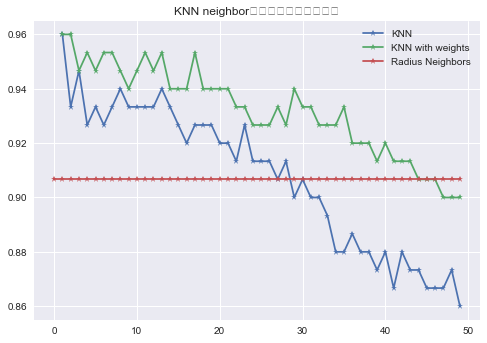

In [138]:
all_result =  neighbor_BestKNN(x,y,range(0,50))
# 如图所示，KNN与KNNwithWeight两种均有较好表现是在n_neighbor=1时

In [105]:
# 注意到n_neighbor变化时Radius Neighbors准确率无变化。考虑其另一参数radius
import pandas as pd
import numpy as np
def Best_RdiusKNN(x,y,radius_list):
    warnings.filterwarnings('ignore')
    all_results = pd.DataFrame()
    for n_neighbor in range(10):
        mean_results = []
        for n_radius in radius_list:
            # 模型构造
            rknn = RadiusNeighborsClassifier(n_neighbors=n_neighbor,radius=n_radius)

            # 模型准确率
            results=[]
            kfold=KFold(n_splits=10) #10折交叉验证产生器
            cv_result=cross_val_score(rknn,x,y.ravel(),cv=kfold)
            results.append(cv_result)# 3种模型，均得到10次评分
            mean_results.append(results[0].mean())
        all_results[str(n_neighbor)] = mean_results
    
    all_results = all_results.fillna(0)
    # 可视化
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for xlabel in range(10):
        for ylabel in np.arange(0.1,5,0.1):
            z = all_results[str(xlabel)][int(ylabel*10-1)]
            ax.plot(xlabel,ylabel,z,marker = 'o')
    return all_results
    


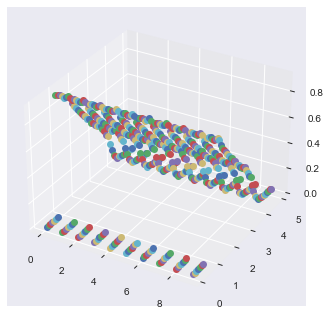

In [106]:
import numpy as np
radius_result =  Best_RdiusKNN(x,y,np.arange(0.1,5,0.1))
radius_result =radius_result.fillna(0)


In [111]:
best_param_for_RadiusKNN = radius_result.where(radius_result == radius_result.max())
best_param_for_RadiusKNN

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.926667,0.926667,0.926667,0.926667,0.926667,0.926667,0.926667,0.926667,0.926667,0.926667
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
综上所述，
KNN、WeightKNN 最佳准确率 96% ,参数选择为 n_neighbor = 1
RadiusKNN 最佳准确率 92.67%, 参数选择为 radius = 0.8, n_neighbor任意
'''

### 二、学习曲线和数据分布图

In [113]:
'''
综上所述，
KNN、WeightKNN 最佳准确率 96% ,参数选择为 n_neighbor = 1
RadiusKNN 最佳准确率 92.67%, 参数选择为 radius = 0.8, n_neighbor任意
'''

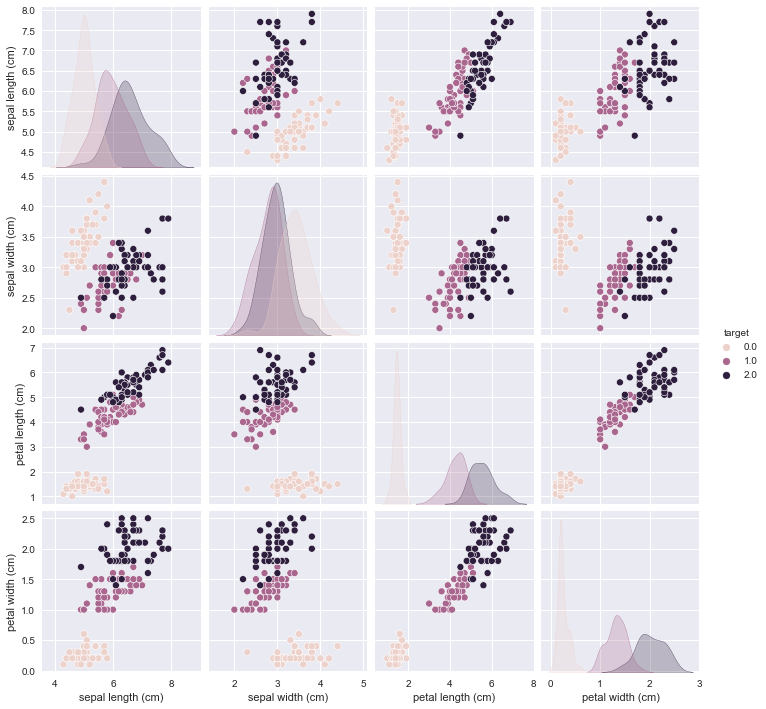

In [142]:
# 原始数据集数据分布
import seaborn as sns
iris_df = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])

g = sns.pairplot(iris_df,hue="target",  markers='o')
plt.show()

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

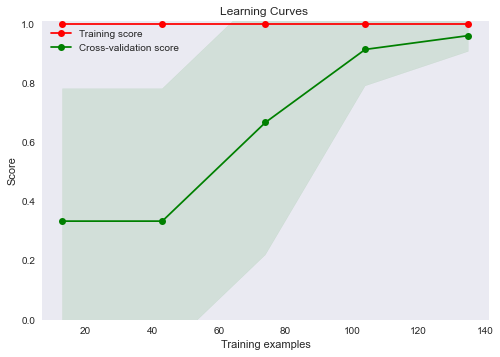

In [140]:
# 学习曲线
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt
BestKNN = KNeighborsClassifier(n_neighbors=1,weights="distance")
kfold=KFold(n_splits=10) #10折交叉验证产生器
cv_result=cross_val_score(model,x,y.ravel(),cv=kfold)

title = r"Learning Curves "
plot_learning_curve(BestKNN, title, x, y, ylim=(0, 1.01), cv=kfold, n_jobs=1)

### 四、预测品种

In [151]:
x_val = np.array([[5.0,2.9,1.0,0.2 ]])#花萼长5cm宽2.9cm，花瓣长1cm宽0.2cm
BestKNN = KNeighborsClassifier(n_neighbors=1,weights="distance")
BestKNN.fit(x_train,y_train)
y_pre=BestKNN.predict(x_val)
print("预测为第{}个品种".format(y_pre[0]))

预测为第0个品种


### 五、非sklearn实现

In [169]:
import numpy as np
from math import sqrt
from collections import Counter

# 参照sklearn源代码实现
class selfKNN:
    # 初始化
    def __init__(self, k):
        assert k >= 1, "k 大于等于1"
        self.k = k
        self._X_train = None
        self._y_train = None

    # 训练
    def fit(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0],"x和y的shape必须一样,用reshape处理一样"
        assert self.k <= X_train.shape[0],"训练集大小不得小于k"
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    # 单个预测
    def point_predict(self, x):
        assert x.shape[0] == self._X_train.shape[1], '特征数量要和x匹配'
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]# 算距离，这里用欧式距离
        nearest = np.argsort(distances)# 距离排序

        sortedK_y = [self._y_train[i] for i in nearest[:self.k]]# 选最近
        votes = Counter(sortedK_y)
        return votes.most_common(1)[0][0]

    # 预测主函数
    def predict(self, X_predict):
        assert self._X_train is not None and self._y_train is not None, "预测前先训练"
        assert X_predict.shape[1] == self._X_train.shape[1], "x和y的shape必须一样,用reshape处理一样"
        y_predict = [self.point_predict(x) for x in X_predict]
        return np.array(y_predict)

    def __repr__(self):
        return "KNN(k={})".format(self.k)

self_KNN=selfKNN(1)
self_KNN.fit(x_train,y_train)
print("预测为第{}个品种".format(self_KNN.predict(x_val)))


预测为第[0]个品种
